
# Introduction to Data Science
## Homework 3 Solutions

Student Name: Harsh Yadav

Student Netid: hy1217


### Part 1 - Preparing a Training Set and Training a Decision Tree (Total 10 Points)
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv` (you can find this on NYU Classes).

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function numpy but do not use the data splitting functions from Sklearn.<br><br>

(2 Points)

In [93]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from io import StringIO
%matplotlib inline

df = pd.read_csv('C:/Users/Harsh Yadav/Downloads/cell2cell_data.csv', header=0)
train_df=df.sample(frac=0.8,random_state=50)
test_df=df.drop(train_df.index)

2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

(1 Point)

<p>
<span style="color:blue">
For showing ourselves or a colleague that our data was indeed randomly sampled on the dataframe df we can see that the size of our training dataframe is 31887 rows × 12 columns and the size of our test dataframe is 7972 rows × 12 columns, so first of all we can see that our data is split in the ratio of 80% training data and 20% test data. Also, we can take a unique element from the original dataset and see after the split, if the element occurs in one of the dataset, either training or test. If this happens then our plit is correct otherwise not. If the data is reperated then we can take the total count of that element and later see if the count is same if we add it from the training and test datasets. Also, we can take a list of 10 elemements sequentially from the source data set and most probably they will end up being in test and training datasets, but not the same one.
</span>
</p>

3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

(1 Point)

In [94]:
Xdt_train=train_df.iloc[:,0:10]
Ydt_train=train_df['churndep']                   #3
Xdt_test=test_df.iloc[:,0:10]
Ydt_test=test_df['churndep']
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(Xdt_train, Ydt_train)
results_dt = clf.predict(Xdt_test)

4\. Using the resulting model from 2.3, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!).

(3 Points)

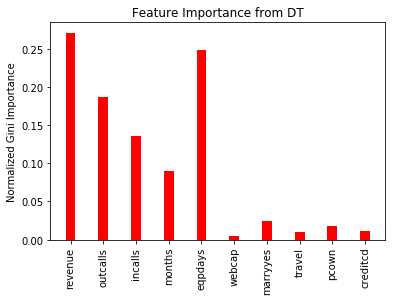

In [95]:
fig, ax = plt.subplots()
width=0.30
ax.bar(np.arange(10), clf.feature_importances_, width, color='r')
ax.set_xticks(np.arange(len(clf.feature_importances_)))
ax.set_xticklabels(train_df.drop('churndep',1).columns.values,rotation=90)
plt.title('Feature Importance from DT')
ax.set_ylabel('Normalized Gini Importance')

5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?

(2 Points)

In [96]:
df[['revenue','outcalls','eqpdays']].corr()

,revenue,outcalls,eqpdays
revenue,1.000000,0.500870,-0.221958
outcalls,0.500870,1.000000,-0.243999
eqpdays,-0.221958,-0.243999,1.000000


<p>
<span style="color:blue">
We can see that the variables Revenue and Outcalls are positively correlated, which means that if we increase either one of them, then the other will increase. This can mean that the number of outgoing calls help in generating more revenue as the company might be getting more people to buy their stuff. But the variables Revenue and eqpdays are negatively correlated which shows that increase one of them will negatively/ oppositely affect the other variable. SO we can infer that if the equipment stays for long with an employee then it might work less efficiently than a new one. Thus, we can say that increasing revenue will increase the outcall but decrease eqpdays.
</span>
</p>

6\. Using the classifier built in 2.3, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each?

(1 Point)

In [97]:
from sklearn.metrics import *
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(Xdt_train, Ydt_train)
results_dt = clf.predict(Xdt_train)
print("Accuracy Score for Training Data:", (accuracy_score(Ydt_train,results_dt)))
clf1 = tree.DecisionTreeClassifier(criterion="entropy")
clf1 = clf1.fit(Xdt_train, Ydt_train)
results_dt1 = clf.predict(Xdt_test)
print("Accuracy Score for Test Data:", (accuracy_score(Ydt_test,results_dt1)))

Accuracy Score for Training Data: 0.99987455703
Accuracy Score for Test Data: 0.528725539388


### Part 2 - Finding a Good Decision Tree (Total 10 Points)
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters min_samples_split and min_samples_leaf. 

(1 Point)

In [98]:
leaf= [1, 3, 7, 10, 12, 15, 18, 20, 25, 30]
split= [3, 7, 15, 25, 30, 40, 45, 55, 60, 3000]

2\. Explain in words your reasoning for choosing the above ranges.

(1 Points)

<p>
<span style="color:blue">
I have chosen the above values for decision trees model as I want to see the increase in accuracy of prediction for small values of leaf and increasing values of split as we make prediction. I want to see the variation in accuracy based on the number of leaves and splits. Increasing splits should definitely increase the accuracy as it improves informaation gain.
</span>
</p>

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

(5 Points)

            1         3         7         10        12        15        18  \
3     0.529227  0.523708  0.531234  0.533241  0.541395  0.540266  0.540893   
7     0.521325  0.521576  0.526719  0.530983   0.53713  0.536628  0.543026   
15    0.539764  0.538886  0.537883  0.534747  0.538259  0.546538  0.549172   
25    0.539012  0.539012  0.538133   0.54014  0.539262  0.543904  0.550176   
30    0.550677  0.550928  0.549799  0.549548   0.54704   0.54867  0.551054   
40    0.546663  0.548545  0.548043  0.546663  0.547291  0.551555  0.551555   
45    0.550301  0.549925  0.549799  0.550426  0.550426  0.547667  0.548921   
55    0.554064  0.553562  0.553562  0.553562  0.553939  0.553061  0.557451   
60    0.553939  0.554064   0.55419   0.55419  0.554691  0.555193  0.554817   
3000  0.557702  0.557577  0.557953  0.557827  0.557827  0.557827  0.557702   

            20        25        30  
3     0.545534  0.548545  0.602735  
7     0.547541  0.550928  0.602735  
15    0.549172  0.549047  0.60

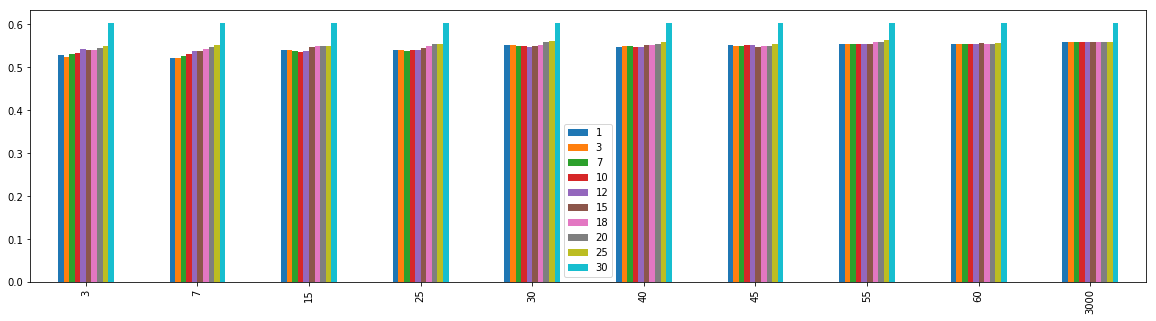

In [99]:
z=0
b=[]
df1 = pd.DataFrame(b, index=split, columns=leaf)
for i in leaf:
    y=0
    for j in split: 
        clf1 = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=i,min_samples_split=j)
        clf1 = clf1.fit(Xdt_train,Ydt_train)
        results_dt = clf1.predict(Xdt_test)
        c=accuracy_score(Ydt_test,results_dt)
        df1.iloc[z:z+1,y:y+1] = c
        y=y+1
    z=z+1
print(df1)
import matplotlib.pyplot as plt
df1.plot.bar(figsize=(20,5))

4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values).

(1 Point)

<p>
<span style="color:blue">
From the results obtained above we can see that with the value of split=3000 we have the highest accuract=y which is nearly 60%. We have the same accuracy for all values for leaf and split value of 3000.
</span>
</p>

5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

(2 Points)

<p>
<span style="color:blue">
I would see which features are more important and try to emphasize on them rather than the features that are less important in improving the efficiency and thus, if we are able to gain more accuracy by improving on those features, then it will be better for the organization. So, based on this model we can provide new equipments, have more incoming and outgoing calls to improve efficiency.
</span>
</p>

### Part 3 - Working with Time Series (Total 10 Points)
Here we will analyze a timeseries of number of Yellow Fever cases from a specific Asian country by year. The data is from 1700 – 2008. The file cases.csv is available on NYU Classes.



1\. Load the timeseries data set, and prepare the dataset by converting the variables to date-time format (hint: use date tools). (1 point)

In [100]:
df4 = pd.read_csv('C:/Users/Harsh Yadav/Downloads/cases.csv', header=0)
df4['YEAR'] = pd.to_datetime(df4['YEAR'], format='%Y')
df4.set_index('YEAR', inplace=True)
df4.index.name=None

2\. Plot the autocorrelation function (ACF) and partial autocorrelation function (PCF) of the cases timeseries. (1 point)

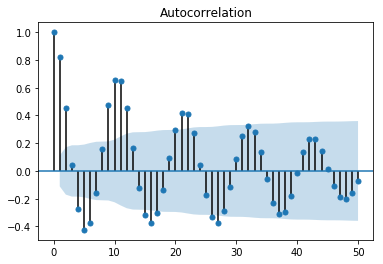

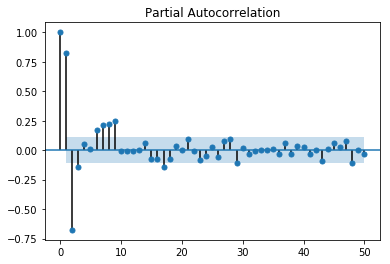

In [101]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df4['YFCASES'], lags = 50)
pyplot.show()

from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df4['YFCASES'], lags=50)
pyplot.show()

3\. Describe what the plots indicate (in terms of autocorrelation and autoregressive parameter (p) and moving average (q)). 2 points.
Some rules of thumb to recall:<br>
Rule 1: If the ACF shows exponential decay, the PACF has a spike at lag 1, and no correlation for other lags, then use one autoregressive (p)parameter <br>
Rule 2: If the ACF shows a sine-wave shape pattern or a set of exponential decays, the PACF has spikes at lags 1 and 2, and no correlation for other lags, the use two autoregressive (p) parameters. <br>
Rule 3: If the ACF has a spike at lag 1, no correlation for other lags, and the PACF damps out exponentially, then use one moving average (q) parameter. <br>
Rule 4: If the ACF has spikes at lags 1 and 2, no correlation for other lags, and the PACF has a sine-wave shape pattern or a set of exponential decays, then use two moving average (q) parameter.<br>
Rule 5: If the ACF shows exponential decay starting at lag 1, and the PACF shows exponential decay starting at lag 1, then use one autoregressive (p) and one moving average (q) parameter.<br>


<p>
<span style="color:blue">
So, we can see that our Autocorrelation is a sine wave shape pattern and our partial correlation function graph has spikes at lags 1 and 2 and no correlation for other lags. Thus, we can conclude that we have Rule 2 that is follewed by our dataset.
</span>
</p>

4\. Another approach to assessing the presence of autocorrelation is by using the  Durbin-Waton (DW) statistic. The value of the DW statistic is close to 2 if the errors are uncorrelated. What is DW for our data, and does this match what you observed from the ACF and PCF plots? (1 point) 

In [102]:
import statsmodels.api as sm 
from statsmodels.tsa.stattools import adfuller
dfoutput=sm.stats.durbin_watson(df4.YFCASES)
print(dfoutput)

0.139528926599


<p>
<span style="color:blue">
So, we can see that the value of Durbin Watson statistic is 0.1395 which is far from value 2, thus we can see that it is related to our above ACF and PCAF functions. So, we can say that the errors are correlated.
</span>
</p>

5\. Removing serial dependency by modeling a simple ARMA process with p and q as derived above. Take a look at what the resulting process looks like (plot) (1 point)


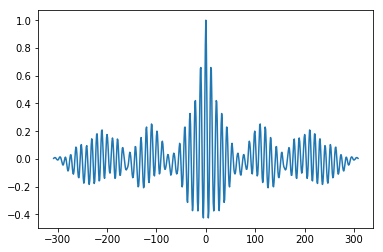

const            49.659343
ar.L1.YFCASES     1.390656
ar.L2.YFCASES    -0.688571
dtype: float64


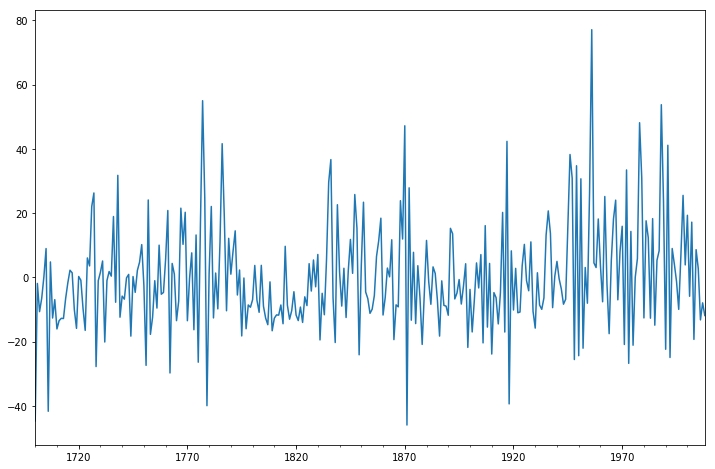

In [103]:
df4['YFCASES1']= df4['YFCASES']
df4['YFCASES1']= (df4['YFCASES1']-df4['YFCASES1'].mean())/(df4['YFCASES1'].std())
plt.acorr(df4['YFCASES1'],maxlags=len(df4['YFCASES1'])-1, linestyle="solid", usevlines=False, marker='')
plt.show()
del df4["YFCASES1"]

arma_model= sm.tsa.ARMA(df4, (2,0)).fit()
print(arma_model.params)

%matplotlib inline
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111)
ax=arma_model.resid.plot(ax=ax);

6\. Calculate the residuals, and test the null hypothesis that the residuals come from a normal distribution, and construct a qq-plot. Do the results of the hypothesis test and qq-plot align? (1 point)



NormaltestResult(statistic=41.736017448911511, pvalue=8.6524472974138723e-10)


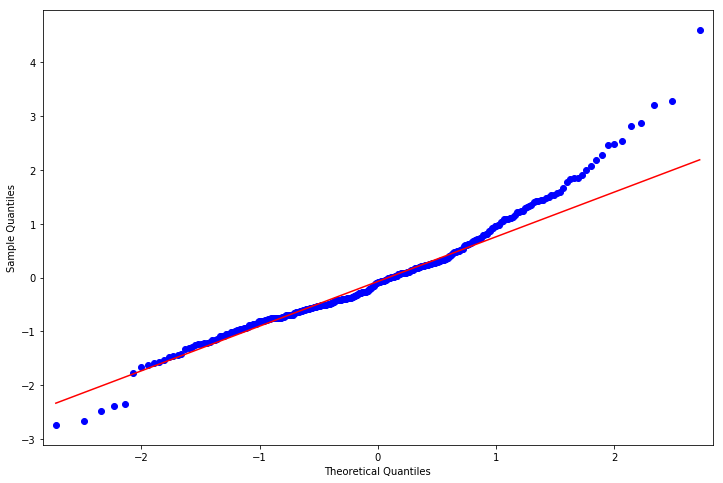

In [104]:
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats
from statsmodels.graphics.api import qqplot
results = sm.tsa.ARMA(df4.YFCASES,(2,0)).fit()
resid = results.resid
print(stats.normaltest(resid))
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

<p>
<span style="color:blue">
After calculating the residuals we can see thatboth the lines are aligned. So we have assessed the null hypothesis that the residuals come from a normal distribution.
</span>
</p>


7\. Now investigate the autocorrelation of your ARMA(p,q) model. Did it improve?
These can be examined graphically, but a statistic will help.
Next, we calculate the lag, autocorrelation (AC), Q statistic and Prob>Q. 
The Ljung–Box Q test is a type of statistical test of whether any of a group of autocorrelations of a time series are different from zero. The null hypothesis is, H0: The data are independently distributed (i.e. the correlations in the population from which the sample is taken are 0, so that any observed correlations in the data result from randomness of the sampling process). (Hint: use qstat in tsa.acf).


In [105]:
a,b,c = sm.tsa.acf(resid.values.squeeze(), qstat=True)
data = np.c_[range(1,41), a[1:], b, c]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob>Q"])
table.set_index('lag')

,AC,Q,Prob>Q
lag,,,
1.0,-0.085220,2.265963,0.132244
2.0,0.103691,5.631595,0.059857
3.0,-0.027833,5.874879,0.117859
4.0,0.091122,8.491075,0.075158
5.0,0.019010,8.605309,0.125881
6.0,0.031321,8.916433,0.178333
7.0,0.044485,9.546129,0.215785
8.0,-0.034337,9.922561,0.270503
9.0,0.185690,20.967736,0.012794


<p>
<span style="color:blue">
So, we have assessed the autocorrelation and we can see that at which lag we have the best values from the above table. We can see that the value of Q increases at lag increases, but the value of AC is random and the value of Prob>Q is also very close to 0.
</span>
</p>

8\. Compute prediction for years 2009-2012 and analyze their fit against actual values. (1 point)

2009-01-01    13.662904
2010-01-01    31.797825
2011-01-01    49.606231
2012-01-01    61.884409
Freq: AS-JAN, dtype: float64


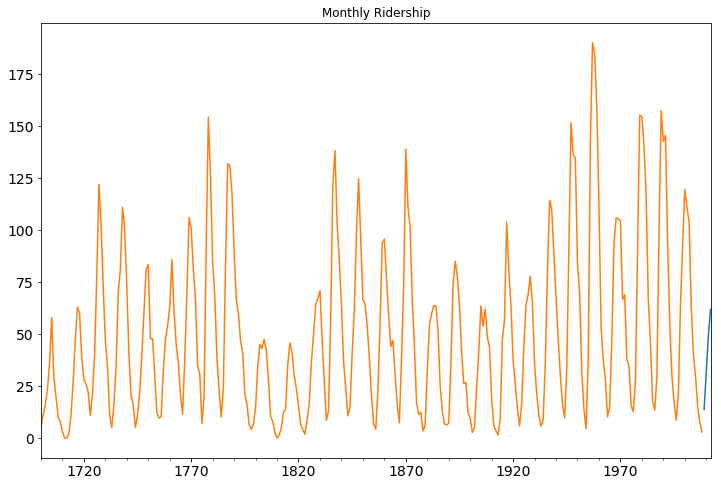

In [106]:
import datetime
results = sm.tsa.ARMA(df4.YFCASES,(2,0)).fit()
print(results.predict('2009','2012', dynamic= True))
results.predict('2009','2012', dynamic= True).plot(figsize=(12,8), title= 'Monthly Ridership', fontsize=14) 
df4.YFCASES.plot(figsize=(12,8), title= 'Monthly Ridership', fontsize=14)

9\. Calculate the forecast error via MAE and MFE.  (2 points)
Reminders:
Mean absolute error: The mean absolute error (MAE) value is computed as the average absolute error value. If MAE is zero the forecast is perfect. As compared to the mean squared error (MSE), this measure of fit “de-emphasizes” outliers (unique or rare large error values will affect the MAE less than the MSE.

Mean Forecast Error (MFE, also known as Bias). The MFE is the average error in the observations. A large positive MFE means that the forecast is undershooting the actual observations. A large negative MFE means the forecast is overshooting the actual observations. A value near zero is ideal, and generally a small value means a pretty good fit. 

The MAE is a better indicator of fit than the MFE.



In [107]:
import sklearn

results = sm.tsa.ARMA(df4.YFCASES,(2,0)).fit()
df4['forecast']=results.predict(start=2,end=308, dynamic= True)
df4=df4.fillna(0)
df4=df4.fillna(0)
print("MAE:")
print(sklearn.metrics.mean_absolute_error(df4.forecast, df4.YFCASES))
forecast_error = df4.YFCASES - df4.forecast
print("MFE:")
print(forecast_error.mean())

MAE:
32.4042204844
MFE:
0.37497544181884024


<p>
<span style="color:blue">
For this part the MAE and MFE cannot be computed as we do not have the actual values for the year 2009 to 2012, so we cannot compute MAE and MFE. But, what I have done is I have forecasted the values for the year 1700 to 2008 and then computed the MFE and MAE for those years. So, we can see that the MAE is very high, but MFE is not too high and is near 0, which means it is ideal.
</span
</p>
